### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
bank=pd.read_csv('bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Understanding

In [3]:
bank.shape

(45211, 17)

In [4]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [8]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [9]:
bank['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [10]:
bank['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [11]:
bank['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [12]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [13]:
bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [14]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [15]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [16]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
from sklearn.preprocessing import LabelEncoder
bank['job']=LabelEncoder().fit_transform(bank[['job']])
bank['marital']=LabelEncoder().fit_transform(bank[['marital']])
bank['education']=LabelEncoder().fit_transform(bank[['education']])
bank['default']=LabelEncoder().fit_transform(bank[['default']])
bank['housing']=LabelEncoder().fit_transform(bank[['housing']])
bank['loan']=LabelEncoder().fit_transform(bank[['loan']])
bank['contact']=LabelEncoder().fit_transform(bank[['contact']])
bank['month']=LabelEncoder().fit_transform(bank[['month']])
bank['poutcome']=LabelEncoder().fit_transform(bank[['poutcome']])
bank['y']=LabelEncoder().fit_transform(bank[['y']])

In [18]:
bank.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object

In [19]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


### EDA - Data Visualization

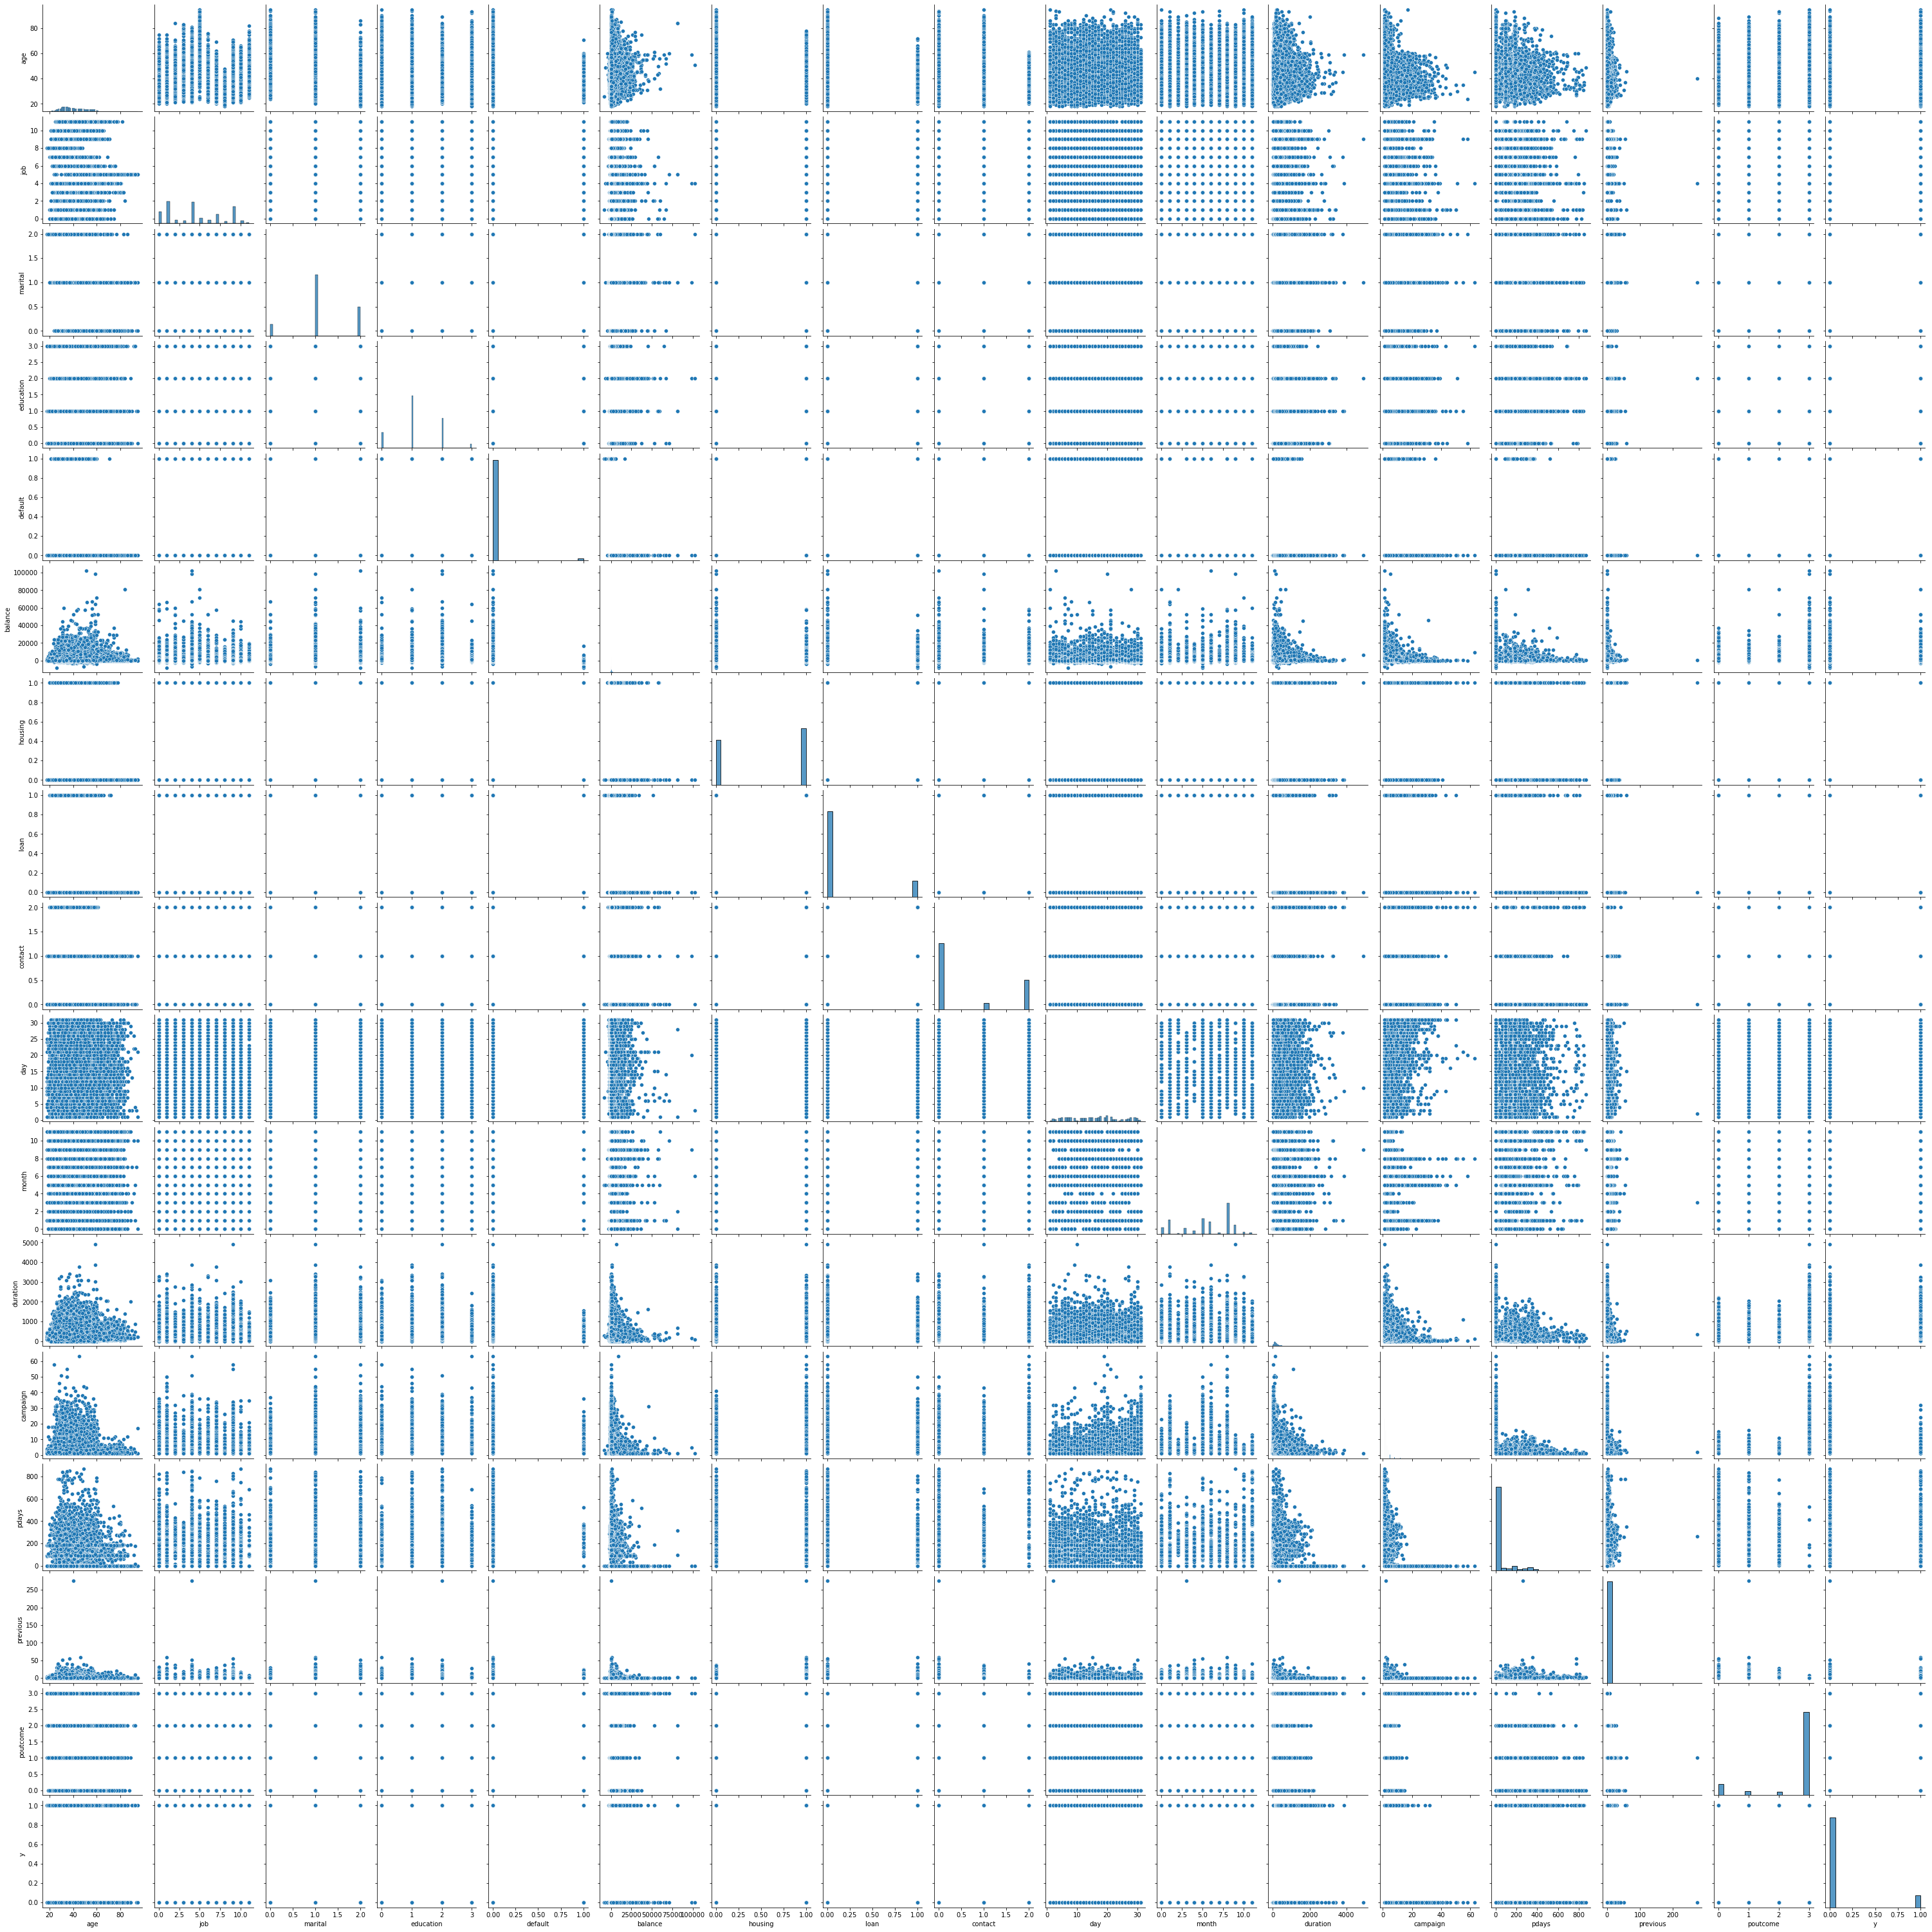

In [20]:
sns.pairplot(data=bank)

### Histogram

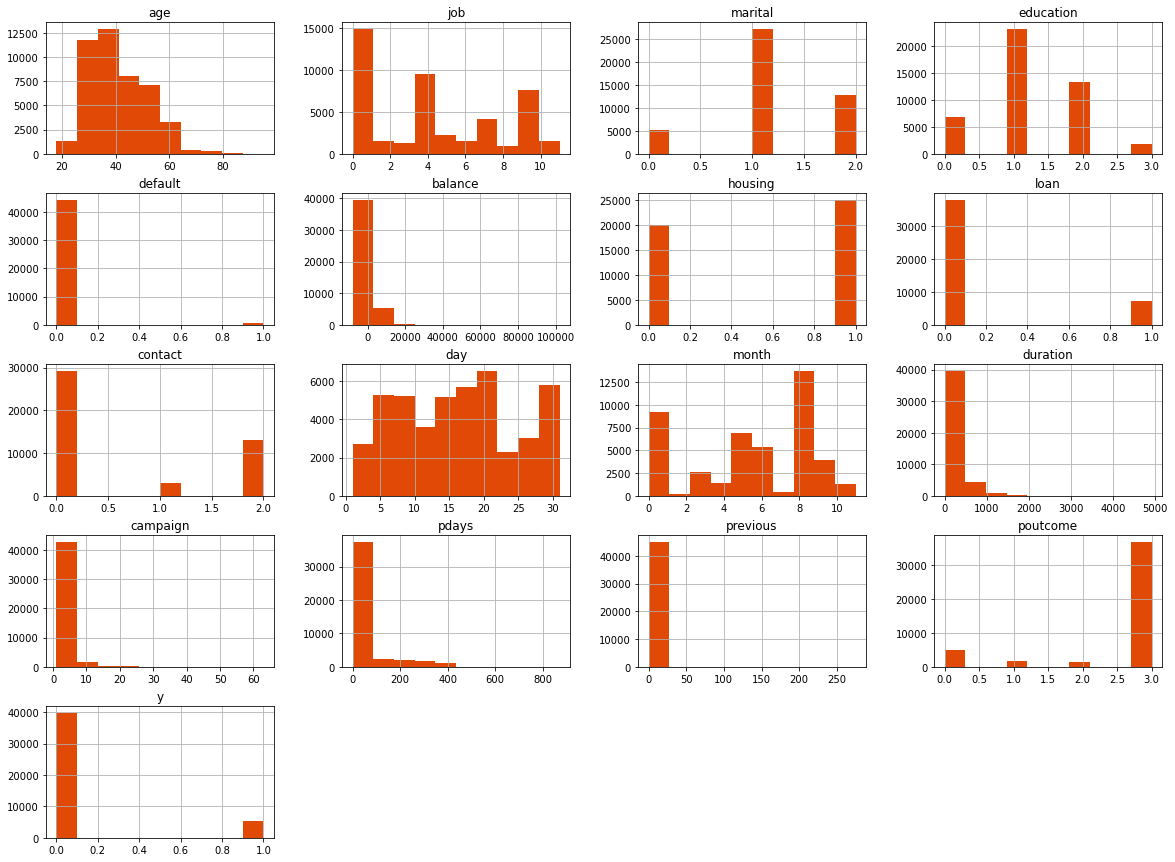

In [21]:
bank.hist(bins=10, figsize=(20,15), color='#E14906')
plt.show()

### Distplot - for Continuous Features

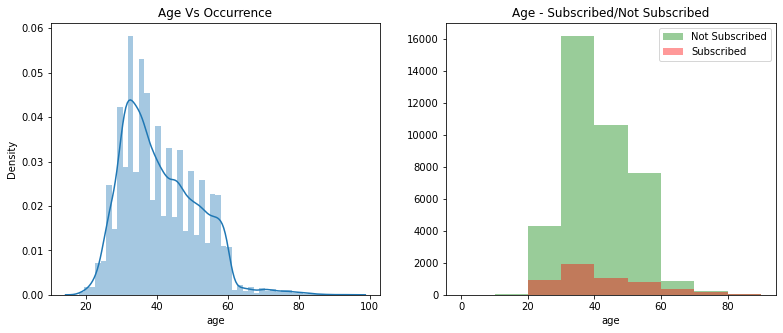

In [22]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(13,5))
sns.distplot(bank['age'],ax=ax1)
ax1.set_title('Age Vs Occurrence')
sns.distplot(bank.age[bank.y==0],ax=ax2,bins=range(0,100,10),label='Not Subscribed',color='green',kde=False)
sns.distplot(bank.age[bank.y==1],ax=ax2,bins=range(0,100,10),label='Subscribed',color='red',kde=False)
plt.legend()
ax2.set_title('Age - Subscribed/Not Subscribed')
plt.show()

Inference:
* Age group ranging from 18 to 95
* 30 to 40 Age group have more subscribers

In [23]:
pd.DataFrame(bank['y'].value_counts())

,y
0,39922
1,5289


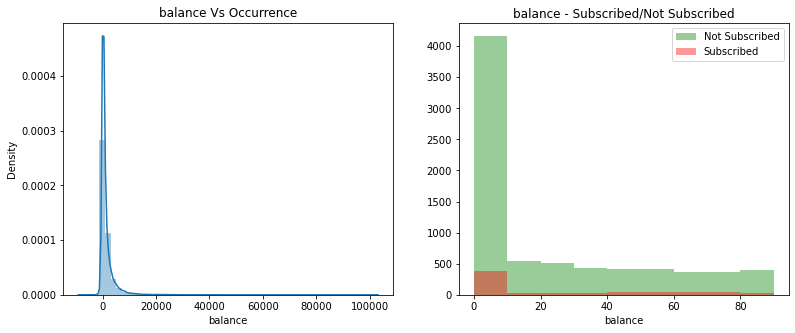

In [24]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(13,5))
sns.distplot(bank['balance'],ax=ax1)
ax1.set_title('balance Vs Occurrence')
sns.distplot(bank.balance[bank.y==0],ax=ax2,bins=range(0,100,10),label='Not Subscribed',color='green',kde=False)
sns.distplot(bank.balance[bank.y==1],ax=ax2,bins=range(0,100,10),label='Subscribed',color='red',kde=False)
plt.legend()
ax2.set_title('balance - Subscribed/Not Subscribed')
plt.show()

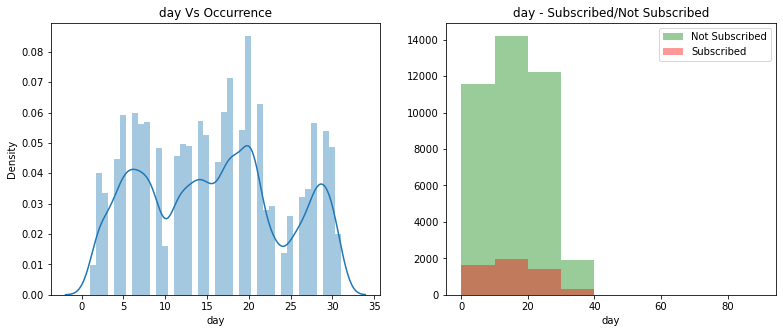

In [25]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(13,5))
sns.distplot(bank['day'],ax=ax1)
ax1.set_title('day Vs Occurrence')
sns.distplot(bank.day[bank.y==0],ax=ax2,bins=range(0,100,10),label='Not Subscribed',color='green',kde=False)
sns.distplot(bank.day[bank.y==1],ax=ax2,bins=range(0,100,10),label='Subscribed',color='red',kde=False)
plt.legend()
ax2.set_title('day - Subscribed/Not Subscribed')
plt.show()

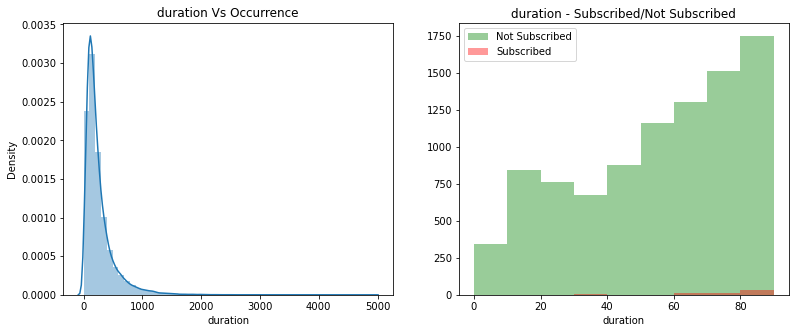

In [26]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(13,5))
sns.distplot(bank['duration'],ax=ax1)
ax1.set_title('duration Vs Occurrence')
sns.distplot(bank.duration[bank.y==0],ax=ax2,bins=range(0,100,10),label='Not Subscribed',color='green',kde=False)
sns.distplot(bank.duration[bank.y==1],ax=ax2,bins=range(0,100,10),label='Subscribed',color='red',kde=False)
plt.legend()
ax2.set_title('duration - Subscribed/Not Subscribed')
plt.show()

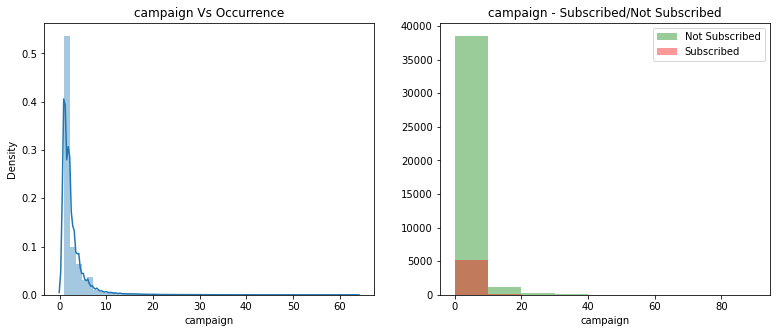

In [27]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(13,5))
sns.distplot(bank['campaign'],ax=ax1)
ax1.set_title('campaign Vs Occurrence')
sns.distplot(bank.campaign[bank.y==0],ax=ax2,bins=range(0,100,10),label='Not Subscribed',color='green',kde=False)
sns.distplot(bank.campaign[bank.y==1],ax=ax2,bins=range(0,100,10),label='Subscribed',color='red',kde=False)
plt.legend()
ax2.set_title('campaign - Subscribed/Not Subscribed')
plt.show()

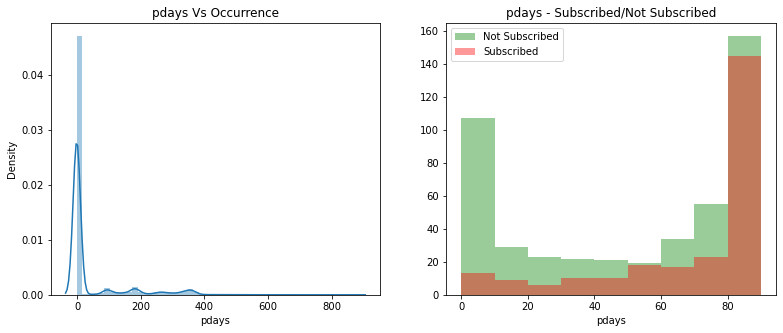

In [28]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(13,5))
sns.distplot(bank['pdays'],ax=ax1)
ax1.set_title('pdays Vs Occurrence')
sns.distplot(bank.pdays[bank.y==0],ax=ax2,bins=range(0,100,10),label='Not Subscribed',color='green',kde=False)
sns.distplot(bank.pdays[bank.y==1],ax=ax2,bins=range(0,100,10),label='Subscribed',color='red',kde=False)
plt.legend()
ax2.set_title('pdays - Subscribed/Not Subscribed')
plt.show()

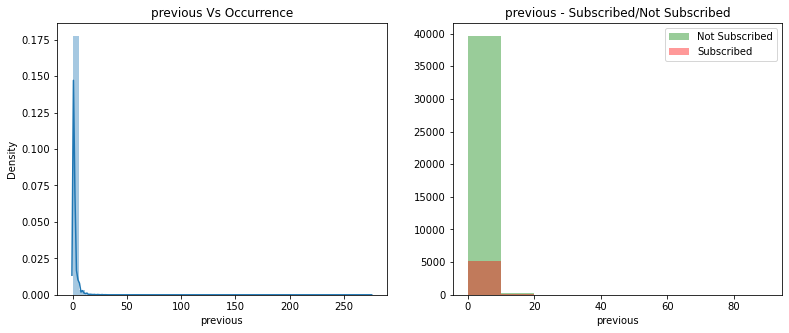

In [29]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(13,5))
sns.distplot(bank['previous'],ax=ax1)
ax1.set_title('previous Vs Occurrence')
sns.distplot(bank.previous[bank.y==0],ax=ax2,bins=range(0,100,10),label='Not Subscribed',color='green',kde=False)
sns.distplot(bank.previous[bank.y==1],ax=ax2,bins=range(0,100,10),label='Subscribed',color='red',kde=False)
plt.legend()
ax2.set_title('previous - Subscribed/Not Subscribed')
plt.show()

##### Normality Check using Probplot (seaborn.distplot). Many features dont follow normality curve.

### Probability Plots - for Continuous Features

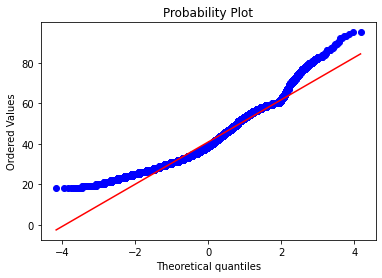

In [30]:
stats.probplot(bank['age'],dist='norm',plot=plt)
plt.show()

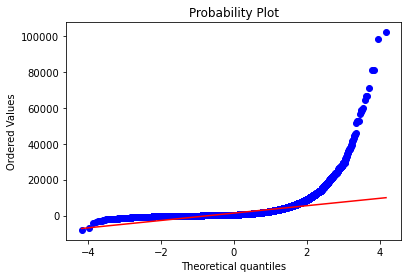

In [31]:
stats.probplot(bank['balance'],dist='norm',plot=plt)
plt.show()

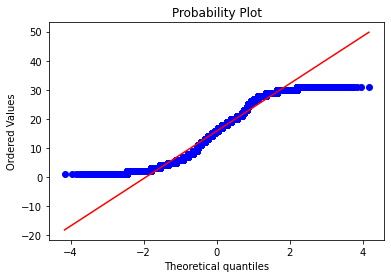

In [32]:
stats.probplot(bank['day'],dist='norm',plot=plt)
plt.show()

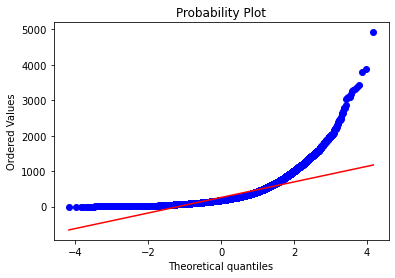

In [33]:
stats.probplot(bank['duration'],dist='norm',plot=plt)
plt.show()

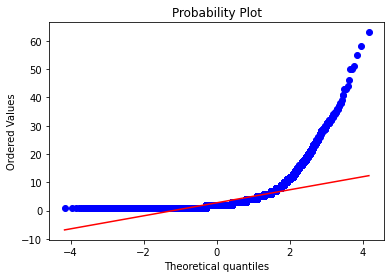

In [34]:
stats.probplot(bank['campaign'],dist='norm',plot=plt)
plt.show()

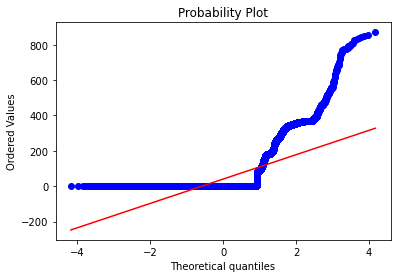

In [35]:
stats.probplot(bank['pdays'],dist='norm',plot=plt)
plt.show()

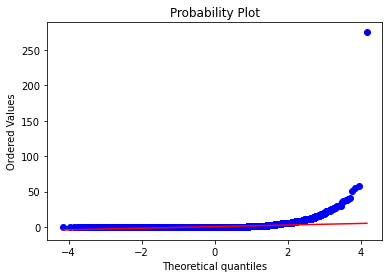

In [36]:
stats.probplot(bank['previous'],dist='norm',plot=plt)
plt.show()

##### Normality Check using Probplot (Scipy.stats.probplot). Many features dont follow normality curve.

### Box Plots for Categorical Features

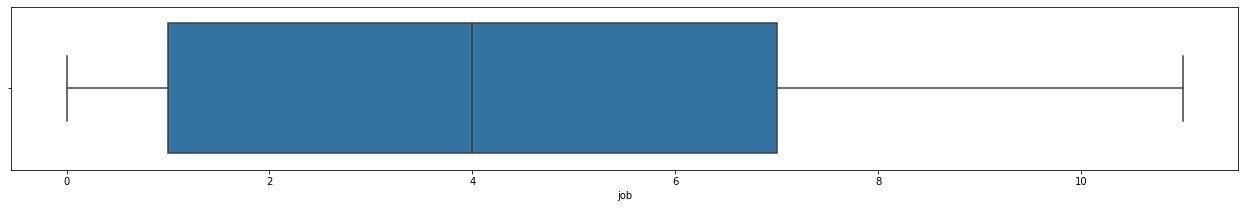

In [37]:
plt.figure(figsize=(22,3))
sns.boxplot(x=bank['job'])
plt.show()

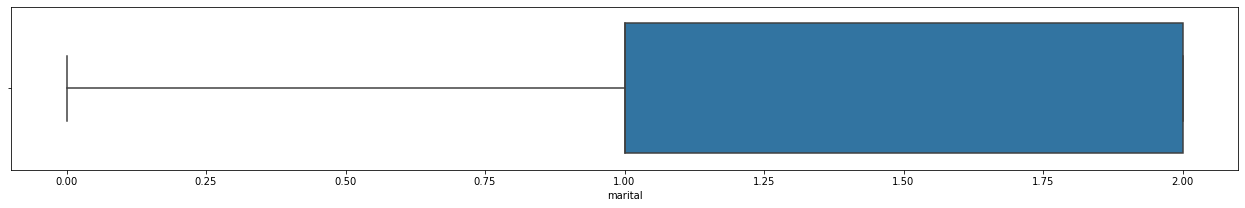

In [38]:
plt.figure(figsize=(22,3))
sns.boxplot(x=bank['marital'])
plt.show()

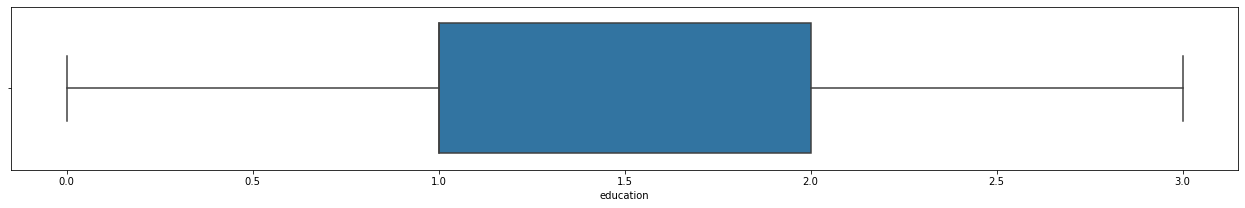

In [39]:
plt.figure(figsize=(22,3))
sns.boxplot(x=bank['education'])
plt.show()

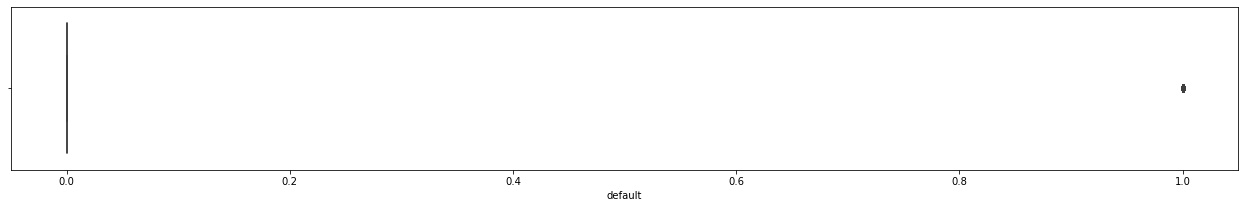

In [40]:
plt.figure(figsize=(22,3))
sns.boxplot(x=bank['default'])
plt.show()

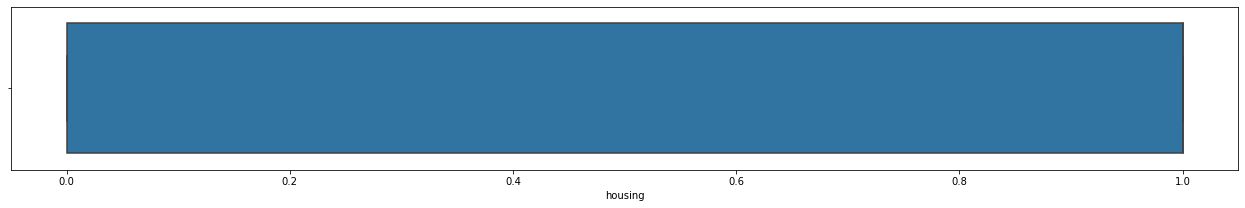

In [41]:
plt.figure(figsize=(22,3))
sns.boxplot(x=bank['housing'])
plt.show()

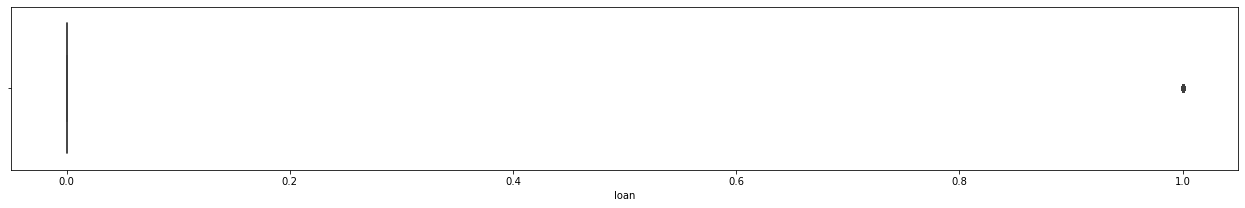

In [42]:
plt.figure(figsize=(22,3))
sns.boxplot(x=bank['loan'])
plt.show()

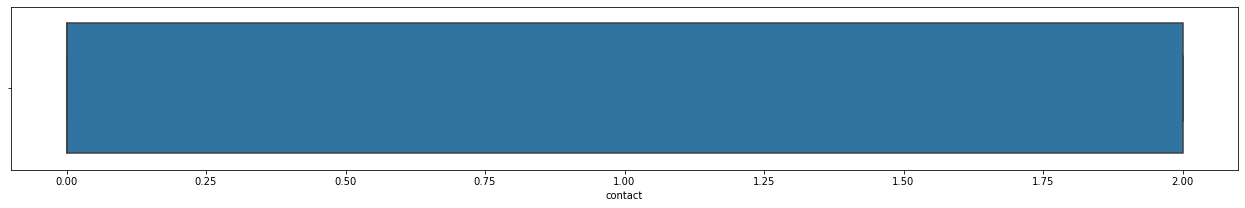

In [43]:
plt.figure(figsize=(22,3))
sns.boxplot(x=bank['contact'])
plt.show()

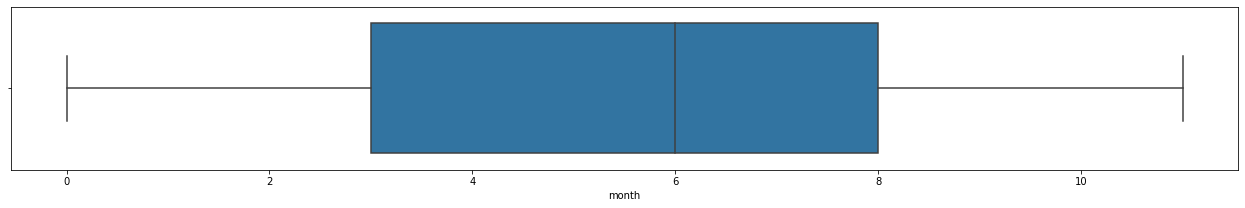

In [44]:
plt.figure(figsize=(22,3))
sns.boxplot(x=bank['month'])
plt.show()

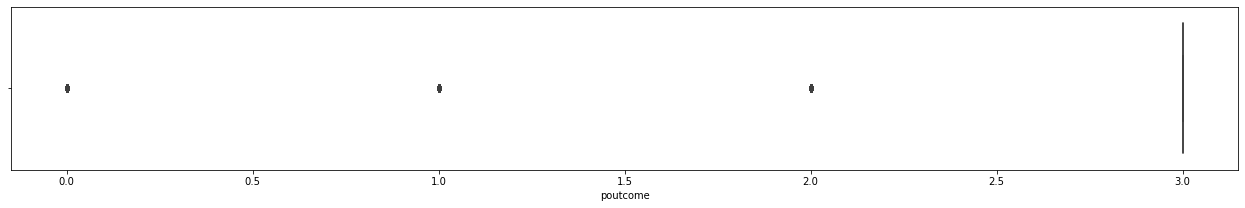

In [45]:
plt.figure(figsize=(22,3))
sns.boxplot(x=bank['poutcome'])
plt.show()

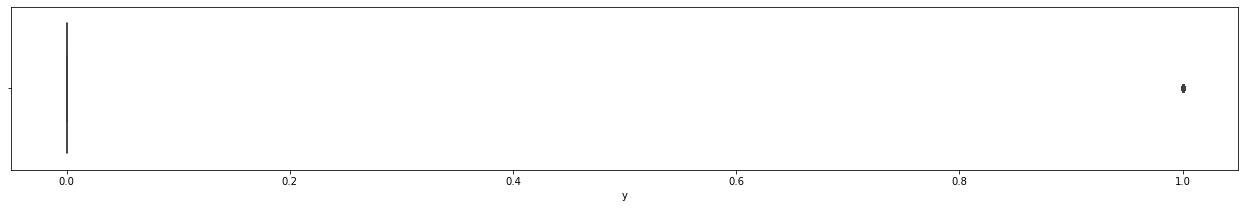

In [46]:
plt.figure(figsize=(22,3))
sns.boxplot(x=bank['y'])
plt.show()

##### Outliers are present in multiple Categorical Features

In [47]:
bank.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


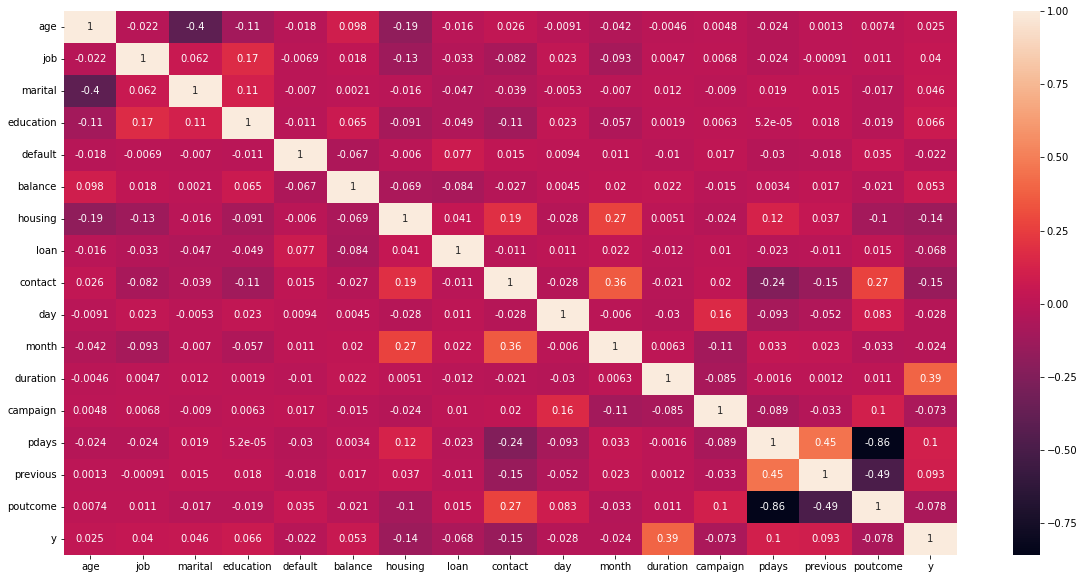

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(bank.corr(),annot=True)
plt.show()

### Model Building

In [49]:
X=bank.drop('y',axis=1)

In [50]:
y=bank['y']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12,shuffle=True)

### Model Training || Model Testing

In [52]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression().fit(X_train,y_train)

In [53]:
y_train_pred=logistic_model.predict(X_train)

In [54]:
y_test_pred=logistic_model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Model Evaluation

In [56]:
accuracy_score(y_train,y_train_pred)

0.8869719088697191

In [57]:
accuracy_score(y_test,y_test_pred)

0.8895278115669578

In [58]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [59]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.57      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [60]:
confusion_matrix(y_train,y_train_pred)

array([[31346,   583],
       [ 3505,   734]], dtype=int64)

In [61]:
confusion_matrix(y_test,y_test_pred)

array([[7847,  146],
       [ 853,  197]], dtype=int64)

### Model Deployment

In [62]:
from pickle import dump
from pickle import load

In [63]:
dump(obj=logistic_model,file=open('logistic_intelligence.pkl','wb'))

In [64]:
loaded_file=load(file=open('logistic_intelligence.pkl','rb'))

In [65]:
loaded_file.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

## End !!!